In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/house_price (1).csv')

**Q1** **:** **Basic Exploratory Data Analysis**

In [4]:
print(" Basic Exploratory Data Analysis")
print("-" * 50)
print( df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData Types:")
print(df.dtypes)
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Q1: Basic Exploratory Data Analysis
--------------------------------------------------

Dataset Shape: (13200, 7)

First 5 rows:
                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  

Data Types:
location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object

Summary Statistics:
         total_sqft          bath         price           bhk  price_per_sqft
coun

# Plot distribution of price_per_sqft

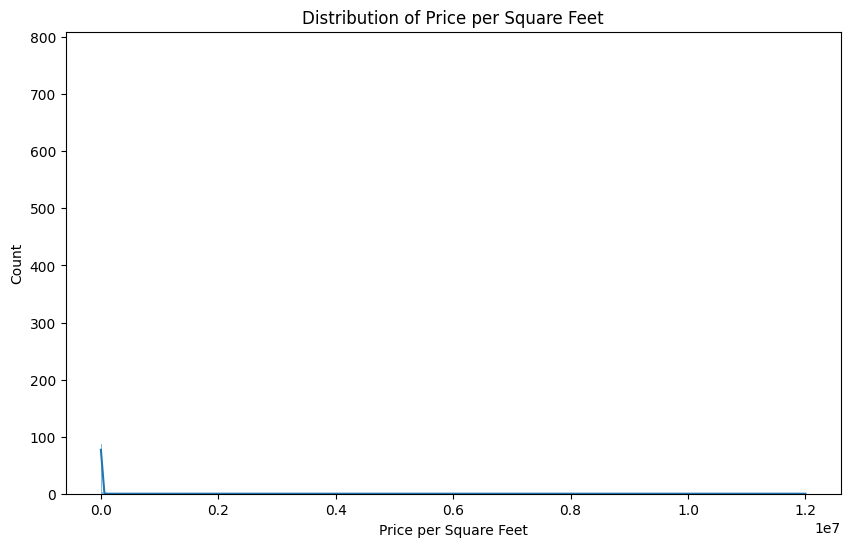

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'].dropna(), kde=True)
plt.title('Distribution of Price per Square Feet')
plt.xlabel('Price per Square Feet')
plt.ylabel('Count')
plt.show()

# Plot boxplot of price _per_sqft

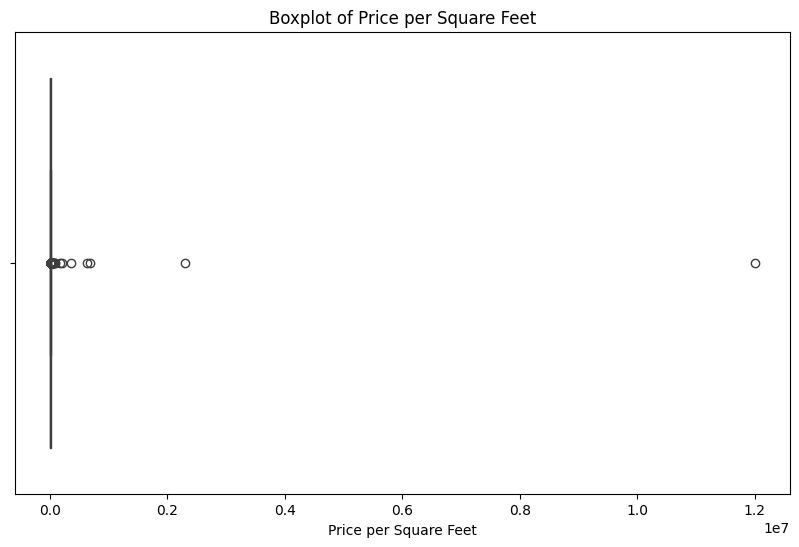

In [8]:
plt.figure(figsize=(10, 6)) # Removed the extra indentation
sns.boxplot(x=df['price_per_sqft'].dropna())
plt.title('Boxplot of Price per Square Feet')
plt.xlabel('Price per Square Feet')
plt.show()

**Q2: Outlier Detection and Removal Using Different Methods**

In [9]:
print("\nQ2: Outlier Detection and Removal")
print("-" * 50)


Q2: Outlier Detection and Removal
--------------------------------------------------


In [10]:
def display_outlier_results(df_original, df_cleaned, method_name):
    removed_count = len(df_original) - len(df_cleaned)
    removed_percentage = (removed_count / len(df_original)) * 100

    print(f"\n{method_name} Results:")
    print(f"Original count: {len(df_original)}")
    print(f"After outlier removal: {len(df_cleaned)}")
    print(f"Removed {removed_count} records ({removed_percentage:.2f}%)")
    print(f"Statistics after removal:\n{df_cleaned['price_per_sqft'].describe()}")


In [11]:
if 'price_per_sqft' in df.columns:
    df_price = df[['price_per_sqft']].copy()

# a) Mean and Standard Deviation Method

In [13]:
mean = df_price['price_per_sqft'].mean()
std = df_price['price_per_sqft'].std()
threshold = 3

->  To identify outliers

In [15]:
lower_limit = mean - threshold * std
upper_limit = mean + threshold * std

# Trimming approach - remove outliers

In [16]:
df_mean_trim = df[~((df['price_per_sqft'] < lower_limit) | (df['price_per_sqft'] > upper_limit))].copy()
display_outlier_results(df, df_mean_trim, "Mean/Std Trimming")


Mean/Std Trimming Results:
Original count: 13200
After outlier removal: 13195
Removed 5 records (0.04%)
Statistics after removal:
count     13195.000000
mean       6713.708602
std        4876.727718
min         267.000000
25%        4266.500000
50%        5434.000000
75%        7313.000000
max      200000.000000
Name: price_per_sqft, dtype: float64


# Capping approach - cap outliers

In [17]:
df_mean_cap = df.copy()
df_mean_cap['price_per_sqft'] = np.where(df_mean_cap['price_per_sqft'] > upper_limit, upper_limit,
                                    np.where(df_mean_cap['price_per_sqft'] < lower_limit, lower_limit,
                                    df_mean_cap['price_per_sqft']))
display_outlier_results(df, df_mean_cap, "Mean/Std Capping")


Mean/Std Capping Results:
Original count: 13200
After outlier removal: 13200
Removed 0 records (0.00%)
Statistics after removal:
count     13200.000000
mean       6835.446522
std        7930.115195
min         267.000000
25%        4267.000000
50%        5438.000000
75%        7317.000000
max      328101.817727
Name: price_per_sqft, dtype: float64


# b) Percentile Method

In [19]:
print("\nb) Percentile Method")
lower_percentile = 0.05  # 5th percentile
upper_percentile = 0.95  # 95th percentile

lower_limit = df_price['price_per_sqft'].quantile(lower_percentile)
upper_limit = df_price['price_per_sqft'].quantile(upper_percentile)

print(f"Lower limit (5th percentile): {lower_limit}")
print(f"Upper limit (95th percentile): {upper_limit}")


b) Percentile Method
Lower limit (5th percentile): 3107.8500000000004
Upper limit (95th percentile): 15312.099999999984


Triming approach

In [20]:
df_pct_trim = df[~((df['price_per_sqft'] < lower_limit) | (df['price_per_sqft'] > upper_limit))].copy()
display_outlier_results(df, df_pct_trim, "Percentile Trimming")


Percentile Trimming Results:
Original count: 13200
After outlier removal: 11880
Removed 1320 records (10.00%)
Statistics after removal:
count    11880.000000
mean      6134.521380
std       2505.693062
min       3108.000000
25%       4380.000000
50%       5438.000000
75%       7024.500000
max      15311.000000
Name: price_per_sqft, dtype: float64


Capping approach

In [21]:
df_pct_cap = df.copy()
df_pct_cap['price_per_sqft'] = np.where(df_pct_cap['price_per_sqft'] > upper_limit, upper_limit,
                                   np.where(df_pct_cap['price_per_sqft'] < lower_limit, lower_limit,
                                   df_pct_cap['price_per_sqft']))
display_outlier_results(df, df_pct_cap, "Percentile Capping")


Percentile Capping Results:
Original count: 13200
After outlier removal: 13200
Removed 0 records (0.00%)
Statistics after removal:
count    13200.000000
mean      6442.066742
std       3197.780056
min       3107.850000
25%       4267.000000
50%       5438.000000
75%       7317.000000
max      15312.100000
Name: price_per_sqft, dtype: float64


# c) IQR Method

In [23]:
Q1 = df_price['price_per_sqft'].quantile(0.25)
Q3 = df_price['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower limit: {lower_limit}")
print(f"Upper limit: {upper_limit}")


Q1 (25th percentile): 4267.0
Q3 (75th percentile): 7317.0
IQR: 3050.0
Lower limit: -308.0
Upper limit: 11892.0


Trimming approach

In [24]:
df_iqr_trim = df[~((df['price_per_sqft'] < lower_limit) | (df['price_per_sqft'] > upper_limit))].copy()
display_outlier_results(df, df_iqr_trim, "IQR Trimming")


IQR Trimming Results:
Original count: 13200
After outlier removal: 11935
Removed 1265 records (9.58%)
Statistics after removal:
count    11935.000000
mean      5575.925513
std       1957.779783
min        267.000000
25%       4166.000000
50%       5188.000000
75%       6603.000000
max      11875.000000
Name: price_per_sqft, dtype: float64


Capping approach

In [25]:
df_iqr_cap = df.copy()
df_iqr_cap['price_per_sqft'] = np.where(df_iqr_cap['price_per_sqft'] > upper_limit, upper_limit,
                               np.where(df_iqr_cap['price_per_sqft'] < lower_limit, lower_limit,
                               df_iqr_cap['price_per_sqft']))
display_outlier_results(df, df_iqr_cap, "IQR Capping")


IQR Capping Results:
Original count: 13200
After outlier removal: 13200
Removed 0 records (0.00%)
Statistics after removal:
count    13200.000000
mean      6181.215985
std       2631.064261
min        267.000000
25%       4267.000000
50%       5438.000000
75%       7317.000000
max      11892.000000
Name: price_per_sqft, dtype: float64


**d) Z-Score Method**

In [48]:
print("\nd) Z-Score Method")
z_scores = stats.zscore(df_price['price_per_sqft'].dropna())
abs_z_scores = np.abs(z_scores)
threshold = 3
filtered_entries = abs_z_scores < threshold
df_z = pd.DataFrame({'price_per_sqft': df_price['price_per_sqft'].dropna(),
                      'z_score': z_scores})


d) Z-Score Method


Trimming approach


In [28]:
df_z_trim = df_z[abs_z_scores < threshold]
print(f"Z-Score Trimming Results:")
print(f"Original count: {len(df_z)}")
print(f"After outlier removal: {len(df_z_trim)}")
print(f"Removed {len(df_z) - len(df_z_trim)} records ({((len(df_z) - len(df_z_trim)) / len(df_z)) * 100:.2f}%)")
print(f"Statistics after removal:\n{df_z_trim['price_per_sqft'].describe()}")


Z-Score Trimming Results:
Original count: 13200
After outlier removal: 13195
Removed 5 records (0.04%)
Statistics after removal:
count     13195.000000
mean       6713.708602
std        4876.727718
min         267.000000
25%        4266.500000
50%        5434.000000
75%        7313.000000
max      200000.000000
Name: price_per_sqft, dtype: float64


Capping approach

In [29]:
df_z_cap = df_z.copy()
z_threshold = threshold

mean = df_z_cap['price_per_sqft'].mean()
std = df_z_cap['price_per_sqft'].std()
lower_limit = mean - z_threshold * std
upper_limit = mean + z_threshold * std

df_z_cap['price_per_sqft'] = np.where(df_z_cap['price_per_sqft'] > upper_limit, upper_limit,
                             np.where(df_z_cap['price_per_sqft'] < lower_limit, lower_limit,
                             df_z_cap['price_per_sqft']))

print(f"\nZ-Score Capping Results:")
print(f"Original count: {len(df_z)}")
print(f"Statistics after capping:\n{df_z_cap['price_per_sqft'].describe()}")


Z-Score Capping Results:
Original count: 13200
Statistics after capping:
count     13200.000000
mean       6835.446522
std        7930.115195
min         267.000000
25%        4267.000000
50%        5438.000000
75%        7317.000000
max      328101.817727
Name: price_per_sqft, dtype: float64


**Q3 : Create boxplots to compare method**

In [30]:
print("-" * 50)
plt.figure(figsize=(15, 10))

--------------------------------------------------


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [34]:
df_list = [
(df, 'Original'),
]
df_list = [
(df, 'Original'),
(df_mean_trim, 'Mean/Std Trim'),
(df_pct_trim, 'Percentile Trim'),
(df_iqr_trim, 'IQR Trim'),
]

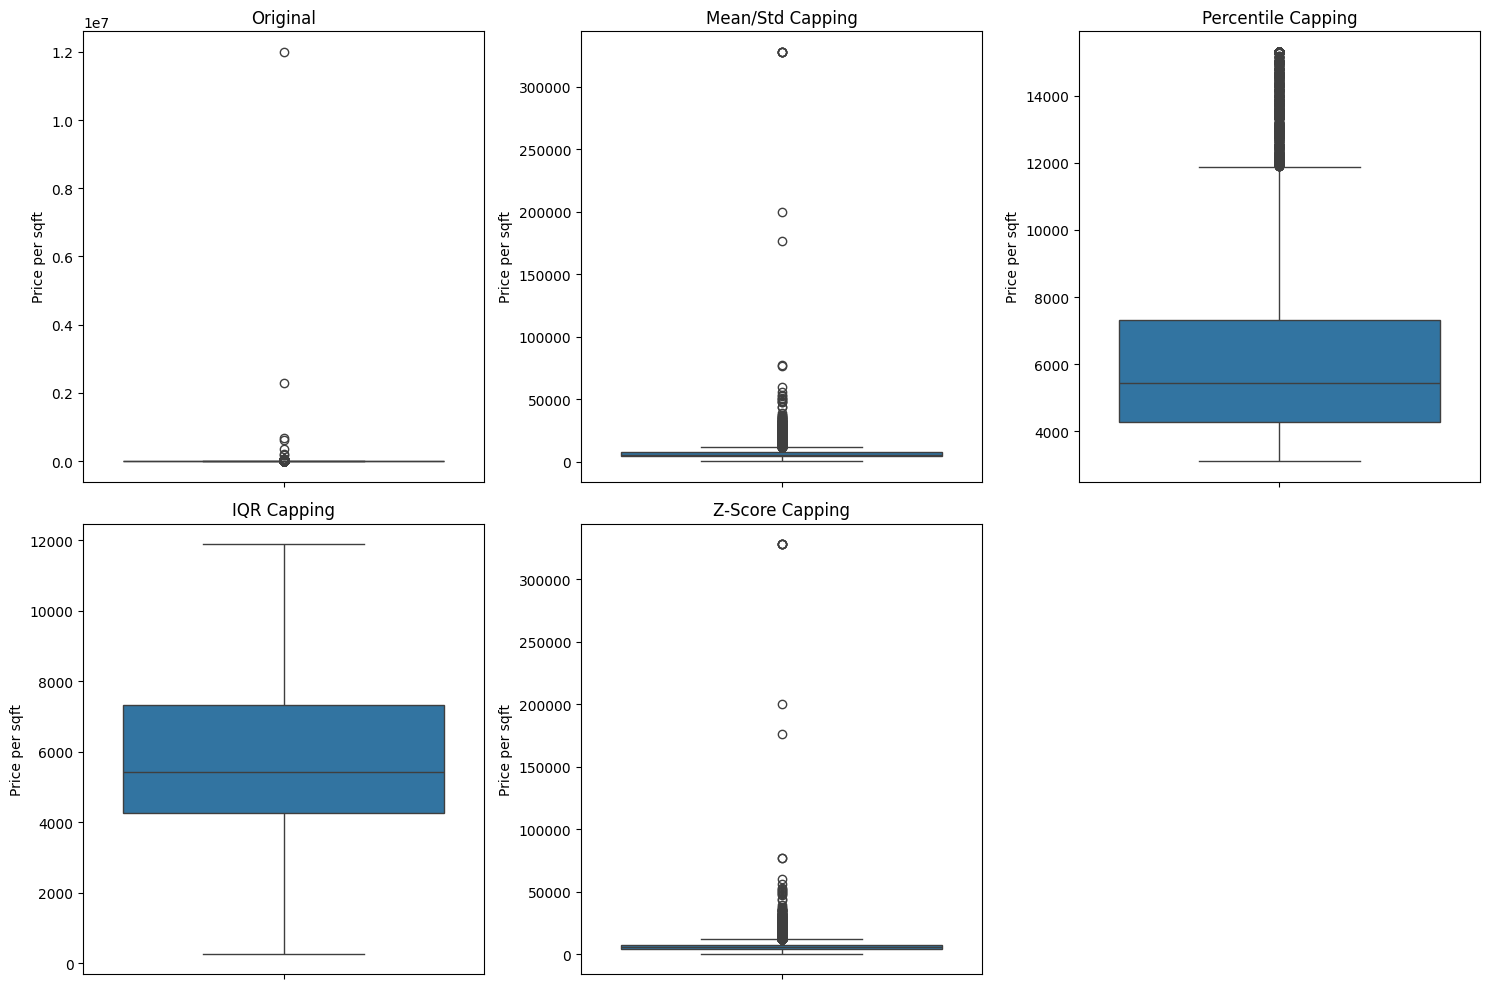

In [37]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(y=df['price_per_sqft'])
plt.title('Original')
plt.ylabel('Price per sqft')

plt.subplot(2, 3, 2)
sns.boxplot(y=df_mean_cap['price_per_sqft'])
plt.title('Mean/Std Capping')
plt.ylabel('Price per sqft')

plt.subplot(2, 3, 3)
sns.boxplot(y=df_pct_cap['price_per_sqft'])
plt.title('Percentile Capping')
plt.ylabel('Price per sqft')

plt.subplot(2, 3, 4)
sns.boxplot(y=df_iqr_cap['price_per_sqft'])
plt.title('IQR Capping')
plt.ylabel('Price per sqft')

plt.subplot(2, 3, 5)
sns.boxplot(y=df_z_cap['price_per_sqft'])
plt.title('Z-Score Capping')
plt.ylabel('Price per sqft')

plt.tight_layout()
plt.show()


 **Q4: Check Normality and Perform Transformations**

In [49]:
def print_normality_stats(data, title):
        skewness = data.skew()
        kurtosis = data.kurtosis()
        print(f"{title}:")
        print(f"Skewness: {skewness}")
        print(f"Kurtosis: {kurtosis}")


Original Data:
Skewness: 108.28105529705168
Kurtosis: 12095.21502832288

After Log Transformation:
Log Transformed Data:
Skewness: 1.4004850530059296
Kurtosis: 9.206942162860814

After Square Root Transformation:
Square Root Transformed Data:
Skewness: 50.926028432980715
Kurtosis: 4034.302850003178

After Box-Cox Transformation (lambda=-0.40488608739033627):
Box-Cox Transformed Data:
Skewness: -0.21170942282331257
Kurtosis: 5.876746899102473


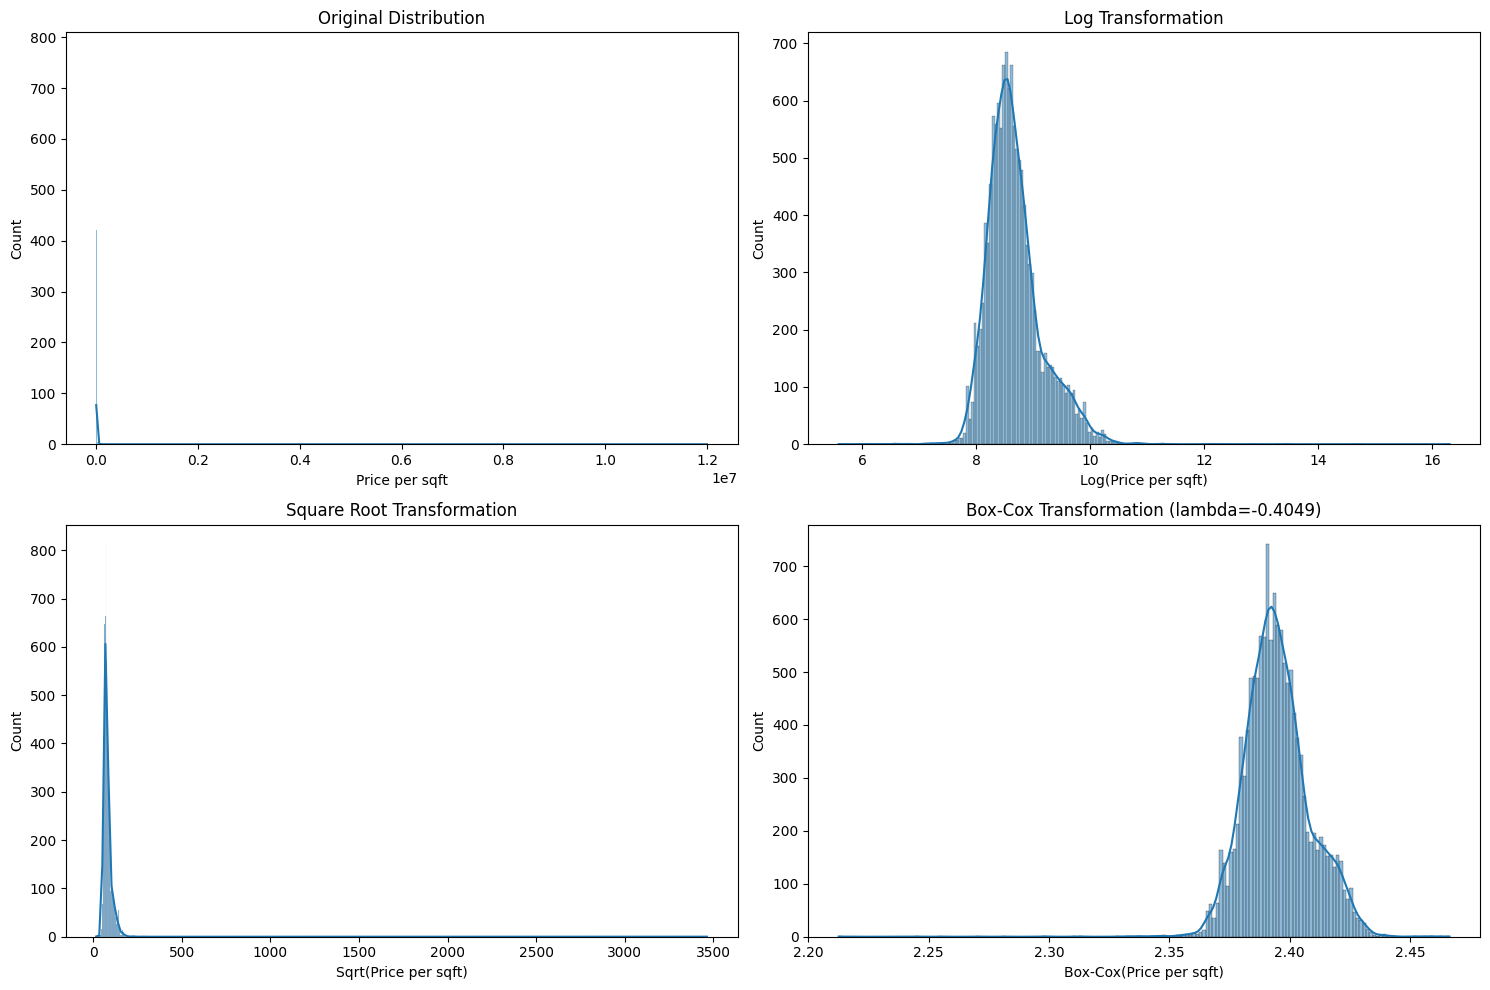

In [52]:
 # Original data normality
print_normality_stats(df['price_per_sqft'], "Original Data")

# Plot original histogram
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Original Distribution')
plt.xlabel('Price per sqft')

# Log transformation
df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])
print("\nAfter Log Transformation:")
print_normality_stats(df['price_per_sqft_log'], "Log Transformed Data")

plt.subplot(2, 2, 2)
sns.histplot(df['price_per_sqft_log'], kde=True)
plt.title('Log Transformation')
plt.xlabel('Log(Price per sqft)')

# Square root transformation
df['price_per_sqft_sqrt'] = np.sqrt(df['price_per_sqft'])
print("\nAfter Square Root Transformation:")
print_normality_stats(df['price_per_sqft_sqrt'], "Square Root Transformed Data")

plt.subplot(2, 2, 3)
sns.histplot(df['price_per_sqft_sqrt'], kde=True)
plt.title('Square Root Transformation')
plt.xlabel('Sqrt(Price per sqft)')

# Box-Cox transformation
if (df['price_per_sqft'] > 0).all():
    df['price_per_sqft_boxcox'], lambda_value = stats.boxcox(df['price_per_sqft'])
    print(f"\nAfter Box-Cox Transformation (lambda={lambda_value}):")
    print_normality_stats(df['price_per_sqft_boxcox'], "Box-Cox Transformed Data")

    plt.subplot(2, 2, 4)
    sns.histplot(df['price_per_sqft_boxcox'], kde=True)
    plt.title(f'Box-Cox Transformation (lambda={lambda_value:.4f})')
    plt.xlabel('Box-Cox(Price per sqft)')

plt.tight_layout()
plt.show()

# **Q5: Correlation between numerical columns**


Q5: Correlation Analysis
--------------------------------------------------
Correlation Matrix:
                       total_sqft      bath     price       bhk  \
total_sqft               1.000000  0.392743  0.574330  0.346013   
bath                     0.392743  1.000000  0.455998  0.897951   
price                    0.574330  0.455998  1.000000  0.396883   
bhk                      0.346013  0.897951  0.396883  1.000000   
price_per_sqft          -0.008267  0.030883  0.028387  0.030955   
price_per_sqft_log       0.106416  0.432546  0.585532  0.411470   
price_per_sqft_sqrt      0.061906  0.254476  0.349165  0.247864   
price_per_sqft_boxcox    0.046916  0.413080  0.543959  0.386632   

                       price_per_sqft  price_per_sqft_log  \
total_sqft                  -0.008267            0.106416   
bath                         0.030883            0.432546   
price                        0.028387            0.585532   
bhk                          0.030955            0.4114

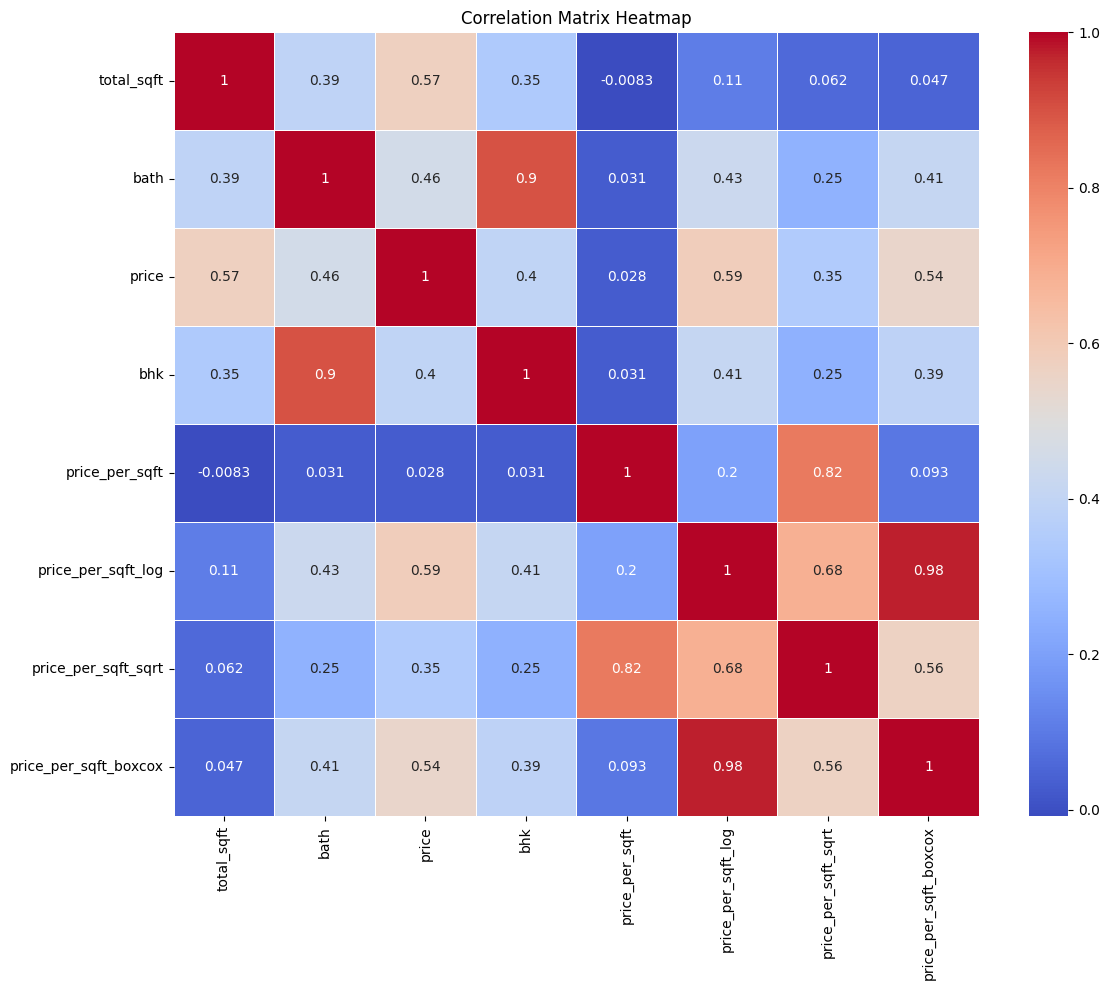

In [54]:
print("\nQ5: Correlation Analysis")
print("-" * 50)

# Select only numerical columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
correlation = df[numeric_cols].corr()

print("Correlation Matrix:")
print(correlation)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

**Q6: Scatter plots between variables**

In [55]:
print("\nQ6: Scatter Plots")
print("-" * 50)


Q6: Scatter Plots
--------------------------------------------------


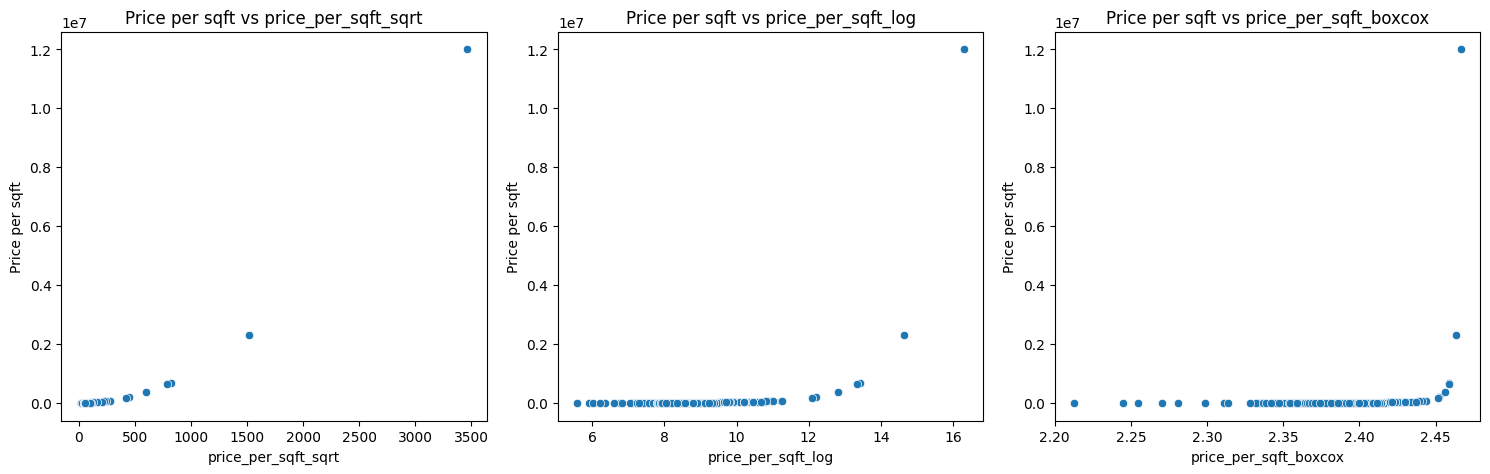

In [61]:
top_correlated = correlation['price_per_sqft'].sort_values(ascending=False).index[1:4]

plt.figure(figsize=(15, 5))
for i, col in enumerate(top_correlated, 1):
    plt.subplot(1, 3, i)  # Indented this line
    sns.scatterplot(x=df[col], y=df['price_per_sqft'])
    plt.title(f'Price per sqft vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price per sqft')

plt.tight_layout()
plt.show()